In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

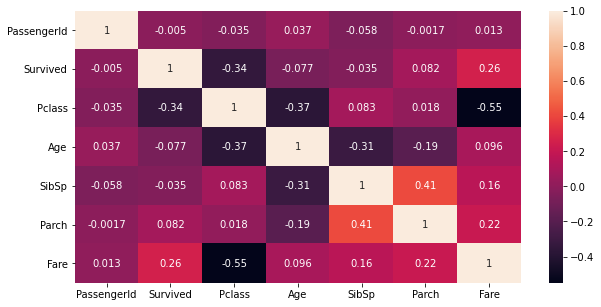

In [8]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True)

In [9]:
survived_and_age_null = df[df['Age'].isnull() & df['Survived']==1]
survived_and_age_null.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q


In [10]:
survived_and_age_null.shape

(52, 12)

In [11]:
# df.groupby('Survived').agg({'Age': 'count'})

Text(0.5, 0, 'Age')

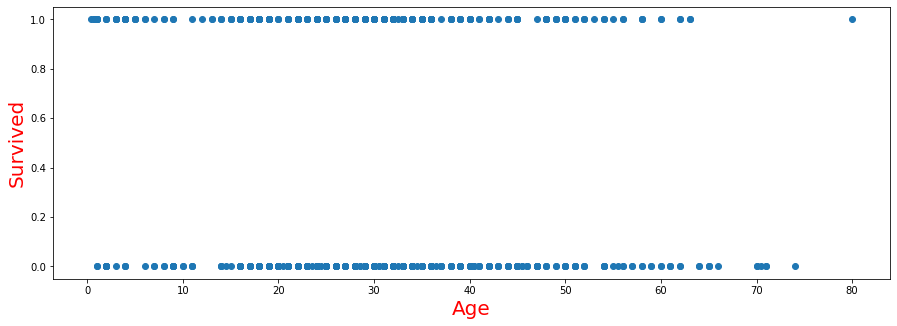

In [12]:
plt.figure(figsize=(15,5))
plt.scatter(df['Age'], df['Survived'])
plt.ylabel('Survived', fontsize = 20,  color = 'r') 
plt.xlabel('Age', fontsize = 20,  color = 'r') 

In [13]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\pankaj verma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pankaj verma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pankaj verma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\p

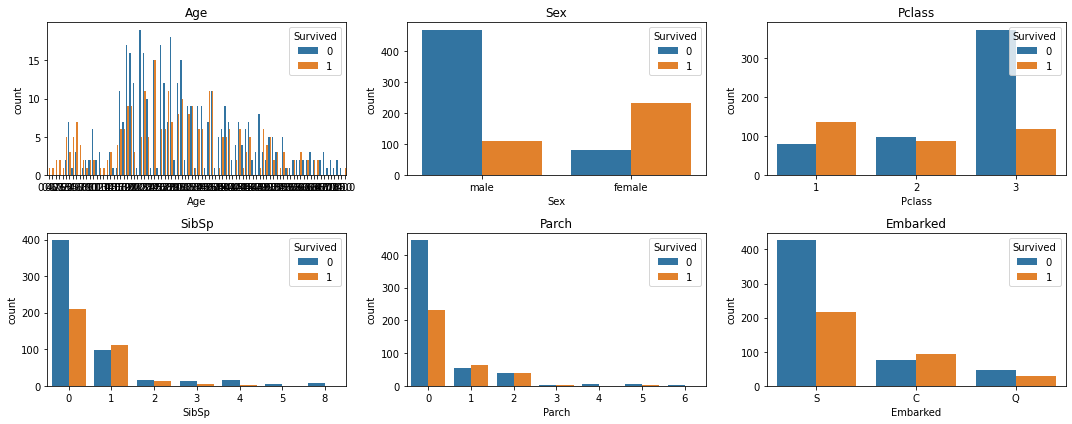

In [15]:
cols = ['Age','Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
n_rows = 2
n_cols = 3
#subplot grid and figure sizes
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*5, n_rows*3))

for r in range(0,n_rows):
    for c in range (0, n_cols):
        i=r*n_cols + c #index for going through columns
        ax = axs[r][c]#position for the subplot
        sns.countplot(df[cols[i]], hue = df['Survived'], ax = ax)
        ax.set_title(cols[i])
        ax.legend(title = 'Survived', loc = "upper right")
plt.tight_layout()   

C:\Users\pankaj verma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

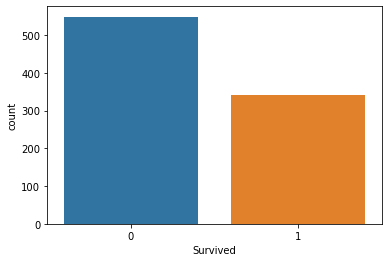

In [16]:
sns.countplot(df['Survived'])

In [17]:
# sns.countplot(df['Pclass'], hue = df['Survived'])

In [18]:
df.groupby('Sex').agg({'Survived':'mean'})

,Survived
Sex,
female,0.742038
male,0.188908


In [19]:
age = pd.cut(df['Age'], [0,20,80])
df.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 20]   0.928571  1.000000  0.510638
       (20, 80]  0.971831  0.896552  0.418182
male   (0, 20]   0.571429  0.526316  0.197368
       (20, 80]  0.382979  0.062500  0.129944

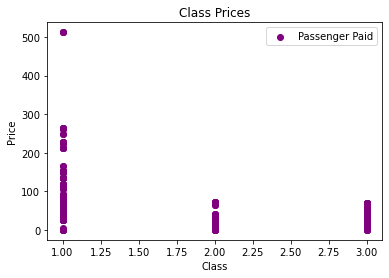

In [20]:
plt.scatter(df['Pclass'], df['Fare'], color = 'purple', label = 'Passenger Paid')
plt.xlabel('Class')
plt.ylabel('Price')
plt.title('Class Prices')
plt.legend()
plt.show()

In [21]:
for col in df:
    print(df[col].value_counts())
    print()
    print()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Meo, Mr. Alfonzo                                   1
Goldschmidt, Mr. George B                          1
Murphy, Miss. Margaret Jane                        1
Sedgwick, Mr. Charles Frederick Waddington         1
Carlsson, Mr. Frans Olof                           1
                                                  ..
Baxter, Mr. Quigg Edmond                           1
Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)    1
Moran, Mr. Daniel J                                1
Thorne, Mrs. Gertrude Maybelle                     1
Windelov, Mr. Einar                                1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..


In [22]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
df.drop(['PassengerId','Ticket','Cabin','Name'], axis = 1, inplace = True)

In [24]:
df.dropna(subset = ['Age','Embarked'], inplace = True)

In [25]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [27]:
sex = pd.get_dummies(df['Sex'])
sex.head(2)

,female,male
0,0,1
1,1,0


In [28]:
embarked = pd.get_dummies(df['Embarked'])

In [29]:
df = pd.concat([df,sex,embarked],axis = 1)

In [30]:
df.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

In [31]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

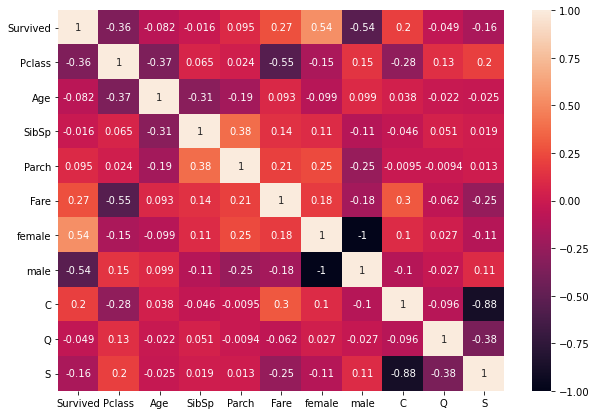

In [32]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True)

In [33]:
X = df.drop('Survived', axis = 1)
y = df['Survived']

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Standard Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Logistic Regression

In [59]:
reg = LogisticRegression(n_jobs = 10)
reg.fit(X_train, Y_train)

LogisticRegression(n_jobs=10)

In [60]:
y_pred = reg.predict(X_test)

In [61]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [63]:
acc = accuracy_score(y_pred, Y_test)
acc

0.8181818181818182

In [64]:
cm = confusion_matrix(y_pred, Y_test)
cm

array([[75, 19],
       [ 7, 42]], dtype=int64)

In [65]:
reg.coef_

array([[-0.90609294, -0.5635469 , -0.40164741, -0.04330354,  0.12367762,
         0.61174459, -0.61174459,  0.13802237, -0.09355975, -0.0873581 ]])

Text(24.0, 0.5, 'Truth')

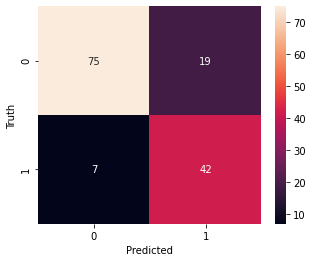

In [66]:
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [67]:
df['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

### Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rfc = RandomForestClassifier(n_estimators = 20, criterion='entropy', random_state = 0)
rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [92]:
y_rfc_pred = rfc.predict(X_test)

In [93]:
accuracy_score(y_rfc_pred, Y_test)

0.8041958041958042

### Gaussian Naive Bayes

In [94]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train, Y_train)

GaussianNB()

In [95]:
gauss_pred = gauss.predict(X_test)

In [96]:
accuracy_score(gauss_pred, Y_test)

0.7412587412587412

### Decision Tree Classifier

In [115]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy')
tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [116]:
dec_pred = tree.predict(X_test)

In [117]:
accuracy_score(dec_pred, Y_test)

0.7272727272727273

### KNN

In [135]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10,  p=2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [136]:
knn_pred = knn.predict(X_test)

In [137]:
accuracy_score(knn_pred, Y_test)

0.7832167832167832